# Introduction

Data yang digunakan berkaitan dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (Deposito berjangka bank) akan ('ya') atau ('tidak') berlangganan.

# Install and Import Libraries

In [1]:
#Data processing
import pandas as pd
import numpy as np

#visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning Process
from sklearn import metrics
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

#features analysis librarie
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2, mutual_info_classif

%matplotlib inline

# Data

In [2]:
BA_full = pd.read_csv('bank-additional-full.csv', sep=';')

In [3]:
#menampilkan 5 data teratas
BA_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#mengetahui dimensi dataset
BA_full.shape

(41188, 21)

In [5]:
#mengetahui daftar atribut
BA_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#mengelompokkan atribut berdasarkan tipe datanya
numerical_columns = list(BA_full.select_dtypes(include=['int64']).columns.values) + list(BA_full.select_dtypes(include=['float64']).columns.values)
categorical_columns = list(BA_full.select_dtypes(include=['object']))

In [7]:
#cetak variabel numerik dan categorikal
print('numerical_columns:', numerical_columns)
print('------------------------------')
print('categorical_columns:', categorical_columns)

numerical_columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
------------------------------
categorical_columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


# Data Cleaning

## Memastikan tidak ada *missing values* pada Kolom kategorikal
pada keterangan dataset yang dilampirkan, missing values pada data ditandai dengan label "unknown" pada beberapa kolom dengan tipe kategorikal. sehingga kolom kategorikal "unknown" diganti **nan** guna menandai adanya missing values

In [8]:
# Mengetahui jumlah "unknown" di setiap atribut
BA_full[BA_full[categorical_columns]=='unknown'].count().sort_values(ascending=False)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64

terlihat beberapa kolom kategorikal banyak mengandung missing values, yaitu: **default, education, housing, loan, job, marital**

### Mengganti "unknown" dengan nan

In [9]:
BA_full[BA_full[categorical_columns]=="unknown"] = np.nan

### memastikan "unknown" sudah terganti dengan nan

In [10]:
BA_full[BA_full[categorical_columns]=='unknown'].count().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

semua label "unknown" sudah diganti dengan nan

### melihat missing values pada kolom kategorikal

In [11]:
BA_full[categorical_columns].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,NaN,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [12]:
#mencetak semua nilai unik pada masing-masing kolom kategori
for cat_col in categorical_columns:
    print("Nilai unik untuk kolom", cat_col.upper())
    print(BA_full[cat_col].unique())
    print('='*30)

Nilai unik untuk kolom JOB
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']
Nilai unik untuk kolom MARITAL
['married' 'single' 'divorced' nan]
Nilai unik untuk kolom EDUCATION
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']
Nilai unik untuk kolom DEFAULT
['no' nan 'yes']
Nilai unik untuk kolom HOUSING
['no' 'yes' nan]
Nilai unik untuk kolom LOAN
['no' 'yes' nan]
Nilai unik untuk kolom CONTACT
['telephone' 'cellular']
Nilai unik untuk kolom MONTH
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Nilai unik untuk kolom DAY_OF_WEEK
['mon' 'tue' 'wed' 'thu' 'fri']
Nilai unik untuk kolom POUTCOME
['nonexistent' 'failure' 'success']
Nilai unik untuk kolom Y
['no' 'yes']


nilai pada masing-masing atribut sudah sesuai dengan apa yang tertera dari deksripsi dataset yang diterima. sehingga tidak ada invalid values pada kolom kategorikal.

## Melihat *missing values* pada kolom numerikal

In [13]:
BA_full[numerical_columns].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [14]:
#mencetak semua nilai unik pada setiap atribut numerikal
for num_col in numerical_columns:
    print("Nilai unik untuk kolom", num_col.upper())
    print(BA_full[num_col].unique())
    print('='*30)

Nilai unik untuk kolom AGE
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Nilai unik untuk kolom DURATION
[ 261  149  226 ... 1246 1556 1868]
Nilai unik untuk kolom CAMPAIGN
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
Nilai unik untuk kolom PDAYS
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
Nilai unik untuk kolom PREVIOUS
[0 1 2 3 4 5 6 7]
Nilai unik untuk kolom EMP.VAR.RATE
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
Nilai unik untuk kolom CONS.PRICE.IDX
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
Nil

semua nilai pada kolom numerik tidak ada *missing values*. namun, pada atribut pdays ada nilai 999 yang menandakan klien sebelumnya tidak dihubungi. ini bisa diganti dengan nilai 0 (Sesuai deskripsi pada dataset yang diterima)

In [15]:
#mengganti nilai 999 pada pdays
BA_full['pdays'].replace(999, 0, inplace=True)

## Merangkum total missing values

In [16]:
print("jumlah missing values atribut kategori:", BA_full[categorical_columns].isnull().sum().sum())
print("jumlah missing values atribut numerikal:", BA_full[numerical_columns].isnull().sum().sum())

jumlah missing values atribut kategori: 12718
jumlah missing values atribut numerikal: 0


## Penanganan Missing Values
- pada data kategorikal, *missing values* akan diisi dengan modus dari atribut X
- pada data numerik, *missing values* akan diisi dengan median dari atribut Z

In [17]:
#Pisahkan data yang bertipe kategorik dan numerik
#categorical data
BA_categorical = BA_full[categorical_columns]

#numerical data
BA_numerical = BA_full[numerical_columns]

In [18]:
#instansiasi kelas SimpleImputer untuk imputer atribut kategorikal
imputer_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [19]:
imputer_categorical.fit(BA_categorical)

SimpleImputer(strategy='most_frequent')

In [20]:
#transform data categorical
BA_categorical = imputer_categorical.transform(BA_categorical)

In [21]:
#buat hasil array ke dalam dataframe
BA_categorical = pd.DataFrame(BA_categorical, columns=categorical_columns)

**Concate categorical columns dengan numerical columns**

In [22]:
BA_full = pd.concat([BA_numerical, BA_categorical], axis=1)

**mengecek apabila masih ada *missing values* yang terlewat**

In [23]:
print("jumlah nan missing values atribut kategori:", BA_full[categorical_columns].isnull().sum().sum())
print("jumlah nan missing values atribut numerikal:", BA_full[numerical_columns].isnull().sum().sum())

jumlah nan missing values atribut kategori: 0
jumlah nan missing values atribut numerikal: 0


setelah dilakukan imputasi, **tidak ada missing values** yang tersisa

In [24]:
BA_full.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,57,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,37,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,40,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,56,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


# Preprocessing dataset

## Encoding Variabel Kategorik

atribut kategorik akan dibagi menjadi:
- Nominal atribut : job, education, contact, month, day_of_week, poutcome **(akan dilakukan one-hot encoding)**
- Ordinal Atribut : marital, default, housing, loan, y **(akan dilakukan label encoding)**


In [25]:
#memilih atribut nominal dari atribut kategori
nominal_columns = ['job', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
ordinal_Columns = ['marital', 'default', 'housing', 'loan', 'y']

**one hot encoding untuk nominal columns**

In [26]:
nominal = pd.get_dummies(BA_full[nominal_columns], drop_first=True)

**Label Encoding untuk ordinal atribut**

In [27]:
ordinal = BA_full.loc[:, ordinal_Columns]

#instansiasi kelas labelEncoder
encoder = LabelEncoder()

#Label encoding
for ord_col in ordinal_Columns:
    ordinal[ord_col] = encoder.fit_transform(ordinal[ord_col])

**concat data hasil one hot encoding dan label encoding**

In [28]:
BA_categorical_encoded = pd.concat([nominal, ordinal], axis=1)

In [29]:
BA_categorical_encoded.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,marital,default,housing,loan,y
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0


# Mengukur pengaruh atribut pada target

### a. pengaruh atribut kategorikal pada target
pengaruh atribut **kategorikal** bisa diukur dengan **Chi-Squared**

In [30]:
#daftar kolom baru hasil encoding
categorical_columns_new = list(BA_categorical_encoded.columns)
categorical_columns_new.remove('y')

#menyiapkan atribut dan target
X_categorical = BA_categorical_encoded.drop('y', axis=1)
y_categorical = BA_categorical_encoded['y']

In [31]:
#instansiasi kelas untuk chi-squared
chi_square = SelectKBest(score_func=chi2, k='all')

#fit chi-square into data
X_categorical_selected = chi_square.fit_transform(X_categorical, y_categorical)

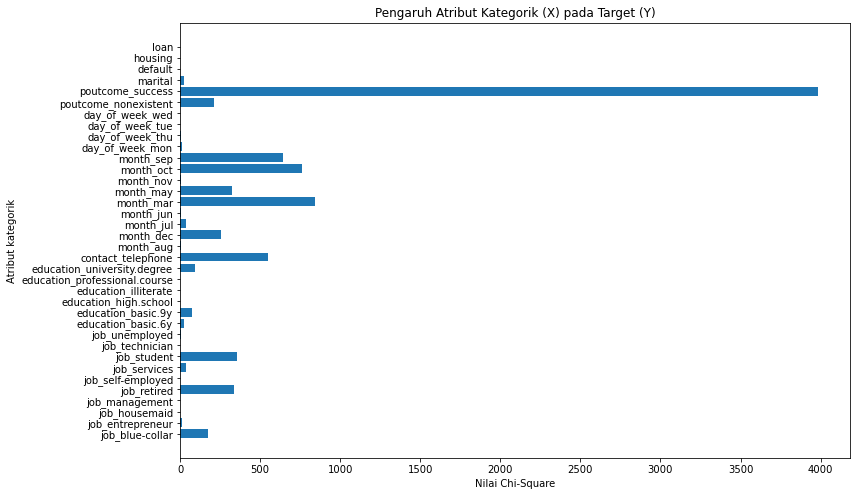

In [32]:
#membuat plot tiap atribut kategorikal
plt.figure(figsize=(12,8))
plt.barh([cat_col for cat_col in categorical_columns_new], chi_square.scores_)
plt.xlabel('Nilai Chi-Square', fontsize = 10)
plt.ylabel('Atribut kategorik', fontsize = 10)
plt.title('Pengaruh Atribut Kategorik (X) pada Target (Y)')
plt.show()

selanjutnya menghapus beberapa atribut kategorik yang memiliki nilai Chi-Square sangat rendah karena menandakan bahwa atribut tersebut tidak memiliki kepentingan terhadap target (label).

### b. Pengaruh atribut numerikal pada target
pengaruh atribut **numerik** terhadap target bia diukur dengan **ANOVA F-score**

In [33]:
# menyiapkan atribut dan target
X_numerical = BA_full[numerical_columns].copy(deep=True)
y_numerical = y_categorical.copy(deep=True)

In [34]:
# instansiasi kelas anova
anova = SelectKBest(score_func=f_classif, k='all')

#fit into data
X_numerical_selected = anova.fit_transform(X_numerical, y_numerical)

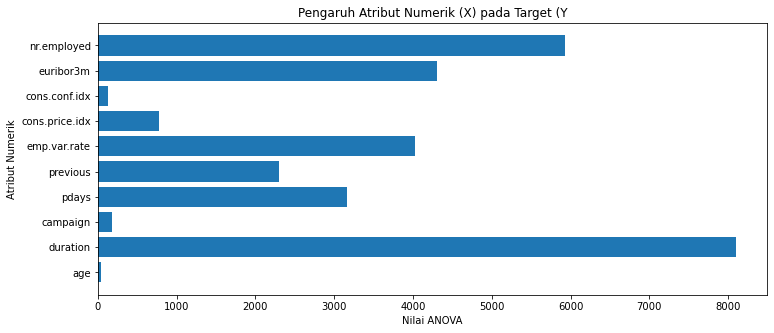

In [35]:
# membuat plot tiap atribut numerik
plt.figure(figsize=(12,5))
plt.barh([num_col for num_col in list(X_numerical.columns)], anova.scores_)
plt.title('Pengaruh Atribut Numerik (X) pada Target (Y')
plt.xlabel('Nilai ANOVA', fontsize=10)
plt.ylabel('Atribut Numerik', fontsize=10)
plt.show()

pada plot yang dihasilkan dapat diketahui bahwa atribut **Durasi** memiliki tingkat pengaruh/kepentingan terhadap target paling tinggi daripadi atribut lainnya.

## Menghapus beberapa atribut / feature yang tidak digunakan

selanjutnya menghapus beberapa atribut kategorik yang memiliki nilai chi-square saangat rendah dan atribut numerik yang memiliki nilai ANOOVA yang sangat rendah karena menandakan bahwa atribut tersebut tidak memiliki kepentingan terhadap target (label).

### Atribut kategorik

In [36]:
BA_categorikal_fix = BA_categorical_encoded.drop(columns=['loan', 'housing', 'default', 'day_of_week_wed', 'day_of_week_tue', 'day_of_week_thu', 'day_of_week_mon', 'month_nov', 'month_jun', 'month_aug', 'education_professional.course', 'education_illiterate', 'education_high.school', 'job_unemployed', 'job_technician', 'job_self-employed', 'job_management', 'job_housemaid', 'job_entrepreneur'])

### Atribut Numeric

In [42]:
numeric = BA_full[numerical_columns]
BA_numerical_fix = numeric.drop(columns='age')

## Menyatukan data numerikal dan data kategorikal

In [44]:
BA_full = pd.concat([BA_numerical_fix, BA_categorikal_fix], axis=1)

In [45]:
BA_full.head()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_dec,month_jul,month_mar,month_may,month_oct,month_sep,poutcome_nonexistent,poutcome_success,marital,y
0,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,1,0,1,0
1,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,1,0,1,0
2,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,1,0,1,0
3,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,1,0,1,0
4,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,1,0,1,0


## Pembagian dataset ke dalam data training dan data testing
dataset dibagi menjadi data training = 70%, dan data testing = 30%.

**menentukan features dan label:**

In [46]:
X = BA_full.drop('y', axis=1)
y = BA_full['y']

**membagi data training dan data testing**

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# 1. Logistic Regression

### Generating Model

In [48]:
model1 = LogisticRegression()

#melatih model
model1.fit(X_train, y_train)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
y_pred1 = model1.predict(X_test)

### Evaluating Model

In [50]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.9052358986809096


dari model Logistik Regresi diperoleh tingkat akurasi sebesar 90,52%

### visualisasi confusion matrix

In [51]:
print(confusion_matrix(y_test, y_pred1))

[[10651   284]
 [  887   535]]


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


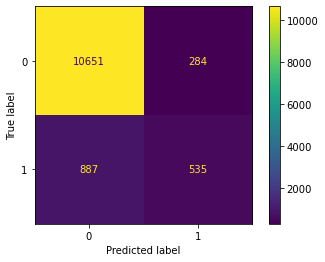

In [52]:
plot_confusion_matrix(model1, X_test, y_test)

Dari confusion matrix yang dihasilkan, diketahui:
- **Benar Negatif** = 10651
- **Salah Positif** = 284
- **Salah negatif** = 887
- **Benar positif** = 535

# 2. K-Nearest Neighbors

### Mencari nilai k terbaik

Text(0, 0.5, 'Error mean')

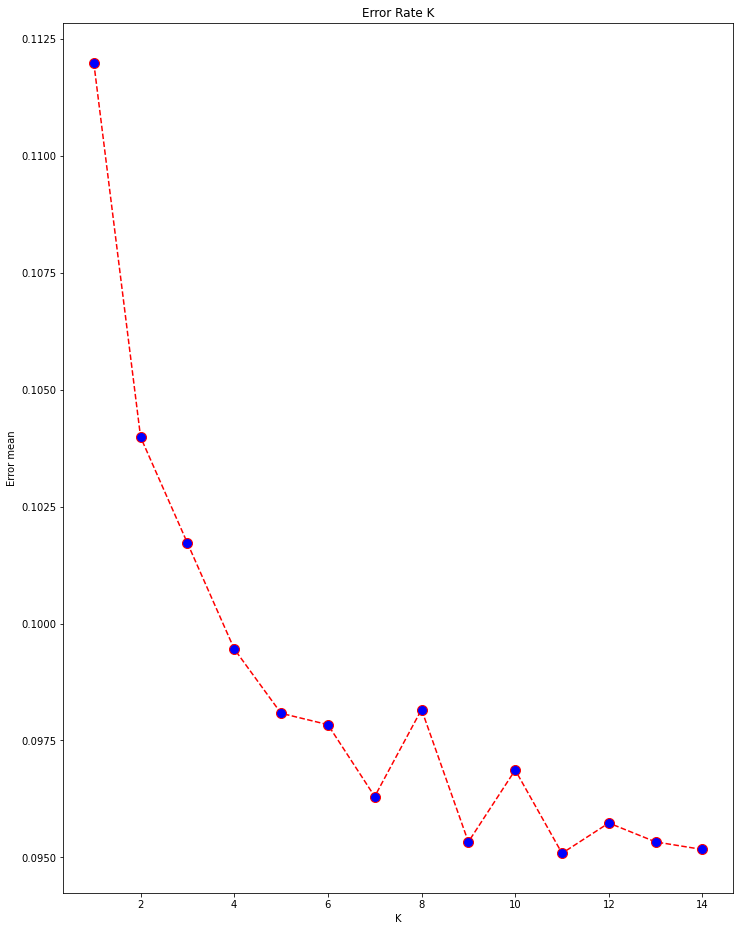

In [53]:
#find best n_neighbors value
error = []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i !=y_test))
    
plt.figure(figsize=(12,16))
plt.plot(range(1,15), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10 )
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

dari error pada grafik terlihat bahwa error terkecil diperoleh 0.095 pada K = 11

### Generating Model

In [54]:
# Create KNN Classifier
model2 = KNeighborsClassifier(n_neighbors=11)

In [55]:
#Train the model using the training sets
model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [56]:
#Predict the response for test datasets
y_pred2 = model2.predict(X_test)

### Evaluating Model

In [57]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.9049121955167112


tingkat klasifikasi menggunakan model KNN diperoleh sebesar 90,49%

### Visualisasi Confusion Matrix

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


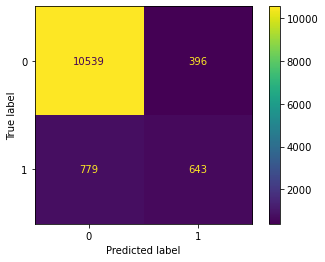

In [58]:
plot_confusion_matrix(model2, X_test, y_test)

Dari confusion matrix yang dihasilkan, diketahui:
- **Benar Negatif** = 10539
- **Salah Positif** = 396
- **Salah negatif** = 779
- **Benar positif** = 643

# 3. Support Vector Machine (SVM)

### Generating Model

In [60]:
#Create a svm Classifier
model3 = svm.SVC(kernel='linear')

In [61]:
#train the model using the training sets
model3.fit(X_train, y_train)

SVC(kernel='linear')

In [62]:
#Predict the response for test dataset
y_pred3 = model3.predict(X_test)

### Evaluating Model

In [63]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.9027271991583717


diperoleh tingkal klasifikasi menggunakan model SVM sebesar 90.27%

### Visualisasi Confusion Matrix

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


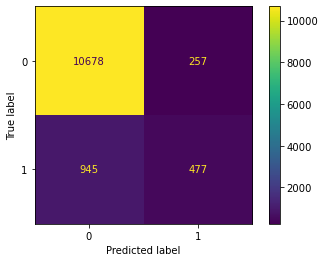

In [64]:
plot_confusion_matrix(model3, X_test, y_test)

Dari confusion matrix yang dihasilkan, diketahui:
- **Benar Negatif** = 10678
- **Salah Positif** = 257
- **Salah negatif** = 945
- **Benar positif** = 477

# 4. Decision Tree

### Generating Model

In [65]:
model4 = tree.DecisionTreeClassifier()
model4.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
y_pred4 = model4.predict(X_test)

### Evaluating Model

In [67]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred4))

Accuracy: 0.8885651857246905


diperoleh tingkat akurasi model Decision tree sebesar 88.85%

### Classification Report

In [68]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10935
           1       0.52      0.50      0.51      1422

    accuracy                           0.89     12357
   macro avg       0.73      0.72      0.72     12357
weighted avg       0.89      0.89      0.89     12357



### Visualisasi Confusion Matrix

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


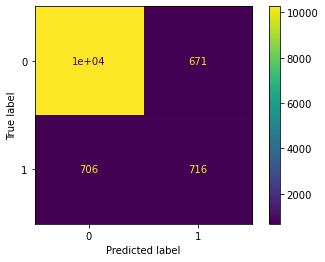

In [69]:
plot_confusion_matrix(model4, X_test, y_test)

Dari confusion matrix yang dihasilkan, diketahui:
- **Benar Negatif** = 10000
- **Salah Positif** = 671
- **Salah negatif** = 706
- **Benar positif** = 716

# 5. Random Forest

### Generating Model

In [70]:
model5 = RandomForestClassifier()
model5.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
y_pred5 = model5.predict(X_test)

### Evaluating Model

In [72]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred5))

Accuracy: 0.9086347819049931


diperoleh tingkat akurasi model Random Forest sebesar 90.86%

### Visulasisasi Confusion Matrix

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


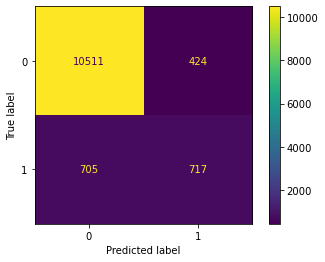

In [73]:
plot_confusion_matrix(model5, X_test, y_test)

Dari confusion matrix yang dihasilkan, diketahui:
- **Benar Negatif** = 10511
- **Salah Positif** = 424
- **Salah negatif** = 705
- **Benar positif** = 717

# 6. Naive Bayes

### General Modeling

In [74]:
model6 = GaussianNB()
model6.fit(X_train, y_train)

GaussianNB()

In [75]:
y_pred6 = model6.predict(X_test)

### Evaluating Model

In [76]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred6))

Accuracy: 0.8700331795743304


tingkat klasifikasi model Naive Bayes sebesar 87.00%

### Visualisasi Confusion Matrix

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


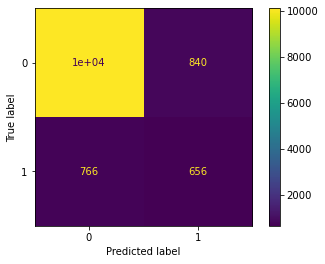

In [77]:
plot_confusion_matrix(model6, X_test, y_test)

Dari confusion matrix yang dihasilkan, diketahui:
- **Benar Negatif** = 10000
- **Salah Positif** = 840
- **Salah negatif** = 766
- **Benar positif** = 656

# Model Terbaik
**acuan:** 
- model terbaik dipilih dengan model yang memiliki accuracy tinggi jika dataset memiliki jumlah data salah negatif dan salah positif yang hampir sama. namun, jika jumlahnya tidak mendekati, maka sebaiknya menggunakan F1 score sebagai acuan.
- memilih model terbaik dengan Recall tertinggi jika kita lebih memilih salah positif lebih baik terjadi daripada salah negatif. dalam kasus ini, maka kita mempertimbangkan recall karena lebih baik algoritma kita memprediksi klien positif berlangganan tetapi sebenarnya tidak, daripada algoritma salah memprediksi bahwa klien tidak berlangganan padahal sebenarnya dia berlangganan.

**tindakan:**
- hasil akurasi dan recall setiap model akan dibandingkan
- model dengan rata-rata recall dan akurasi terbaik akan dipilih sebagai model terbaik

### Accuracy

In [78]:
print('Skor Accuracy Logistik Regression:', metrics.accuracy_score(y_test, y_pred1))
print('Skor Accuracy K-Nearest Neighbors:', metrics.accuracy_score(y_test, y_pred2))
print('Skor Accuracy Support Vector Machine:', metrics.accuracy_score(y_test, y_pred3))
print('Skor Accuracy Decision Tree:', metrics.accuracy_score(y_test, y_pred4))
print('Skor Accuracy Random Forest:', metrics.accuracy_score(y_test, y_pred5))
print('Skor Accuracy Naive Bayes:', metrics.accuracy_score(y_test, y_pred6))

Skor Accuracy Logistik Regression: 0.9052358986809096
Skor Accuracy K-Nearest Neighbors: 0.9049121955167112
Skor Accuracy Support Vector Machine: 0.9027271991583717
Skor Accuracy Decision Tree: 0.8885651857246905
Skor Accuracy Random Forest: 0.9086347819049931
Skor Accuracy Naive Bayes: 0.8700331795743304


hasil skor akurasi menunjukkan bahwa Random Forest memiliki tingkat klasifikasi sebesar 90,86%. pada titik ini, model Random forest memiliki indikasi sebagai model terbaik.
lalu kita lihat pada recall dan confusion matrix model Random Forest:

### Recall dan Confusion Matrix Model Terbaik

In [91]:
print("RECALL SCORE:")
print("Logistik Regression:", metrics.recall_score(y_test, y_pred1))
print("K-Nearest Neighbors:", metrics.recall_score(y_test, y_pred2))
print("Support Vector Machine:", metrics.recall_score(y_test, y_pred3))
print("Decision Tree:", metrics.recall_score(y_test, y_pred4))
print("Random Forest:", metrics.recall_score(y_test, y_pred5))
print("Naive Bayes:", metrics.recall_score(y_test, y_pred6))


RECALL SCORE:
Logistik Regression: 0.3762306610407876
K-Nearest Neighbors: 0.45218002812939523
Support Vector Machine: 0.33544303797468356
Decision Tree: 0.5035161744022504
Random Forest: 0.5042194092827004
Naive Bayes: 0.4613220815752461


Random Forest memiliki nilai recall paling tinggi diantara model yang lainnya, sehinggal model Random Forest memiliki indikasi menjadi model terbaik

# Kesimpulan

Berdasarkan proses pengujian performa model yang dilihat dari nilai accuracy dan recall yang dihasilkan pada tiap model, **Random Forest** memiliki **tingkat akurasi** dan **recall** paling tinggi yaitu sebesar **90.86%** untuk nilai akurasi dan **0.504** untuk recall. sehingga dapat disimpulkan bahwa model **Random Forest** merupakan model terbaik untuk menentukan apakah klien produk (Deposito berjangka bank) akan ('ya') atau ('tidak') berlangganan.